In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import pycrm

sns.set(style='white')
%matplotlib inline

In [2]:
df = pd.read_excel("/home/pfcor/Downloads/chapter-12-relay-foods.xlsx", sheet_name=1)
df.columns = ["order_id", "order_date", "customer_id", "order_value", "sku", "pup_id", "pickup_date"]

COHORT

In [5]:
user_retention_matrix

cohort_group,2009-Q1,2009-Q2,2009-Q3,2009-Q4,2009-Q5,2010-Q1,2010-Q2
cohort_period,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.513514,0.382353,0.398230,0.235294,0.369231,0.230769,NaN
3,0.432432,0.205882,0.168142,0.312217,0.107692,NaN,NaN
4,0.405405,0.078431,0.274336,0.126697,NaN,NaN,NaN
5,0.297297,0.147059,0.123894,NaN,NaN,NaN,NaN
6,0.459459,0.058824,NaN,NaN,NaN,NaN,NaN
7,0.162162,NaN,NaN,NaN,NaN,NaN,NaN


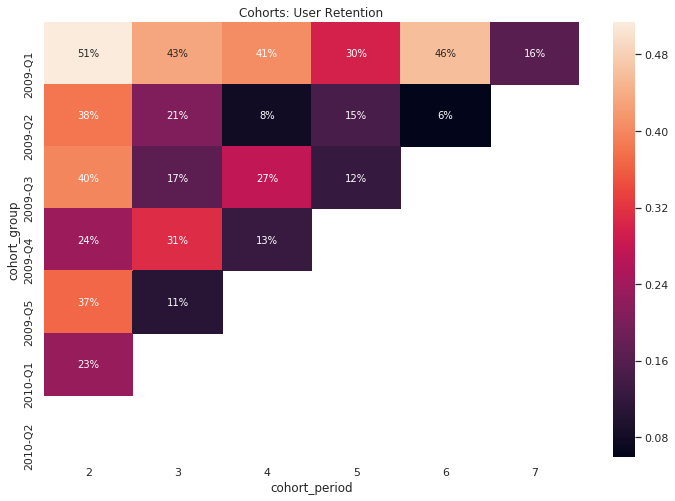

In [6]:
user_retention_matrix = pycrm.user_retention_matrix(df, cohort_frequency="Q")
pycrm.plotting.plot_user_retention_matrix(user_retention_matrix.iloc[1:])

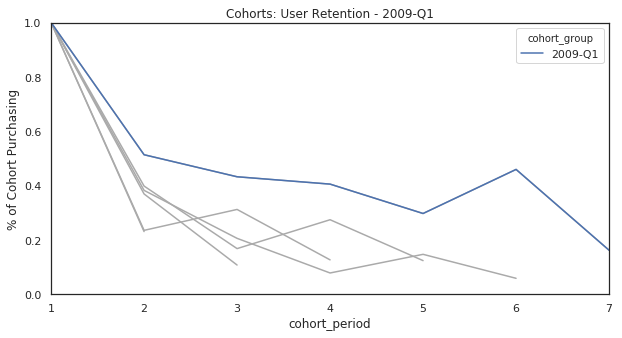

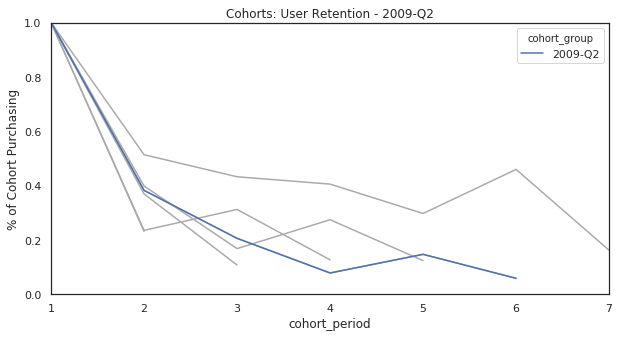

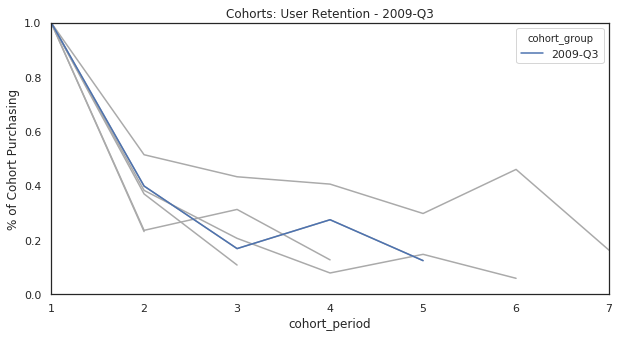

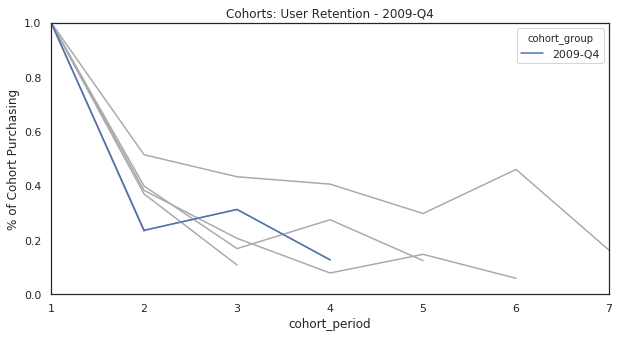

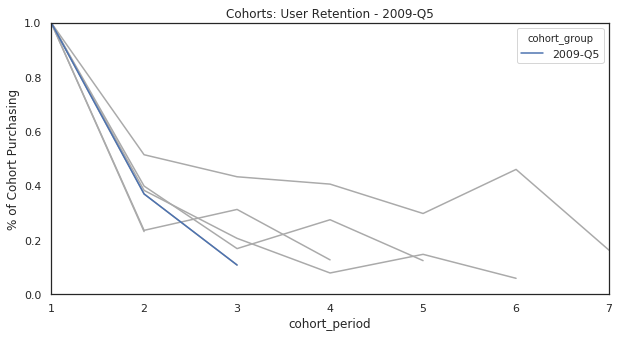

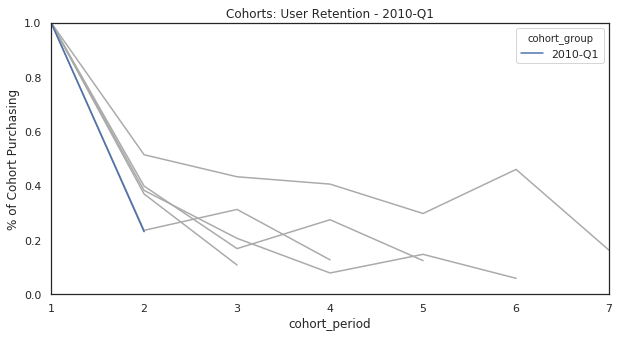

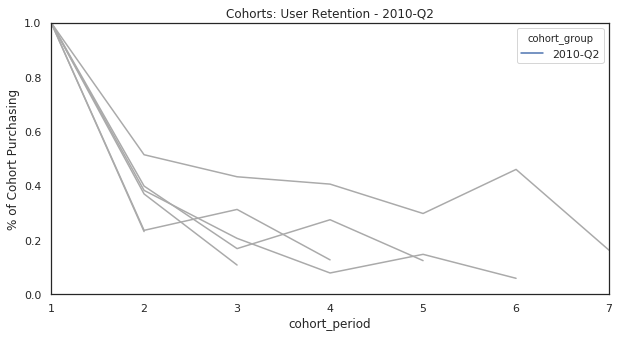

In [8]:
for cg in user_retention_matrix.columns: 
    ax = user_retention_matrix.plot(figsize=(10,5), color="#aaaaaa", legend=False)
    user_retention_matrix[[cg]].plot(ax=ax)
    plt.title(f'Cohorts: User Retention - {cg}')
    plt.xticks(np.arange(1, 7.1, 1))
    plt.xlim(1, 7)
    plt.ylim(0,1)
    plt.ylabel('% of Cohort Purchasing');

In [20]:
user_retention_matrix["2009"]

cohort_group,2009-Q1,2009-Q2,2009-Q3,2009-Q4,2009-Q5,2010-Q1,2010-Q2
cohort_period,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.513514,0.382353,0.398230,0.235294,0.369231,0.230769,NaN
3,0.432432,0.205882,0.168142,0.312217,0.107692,NaN,NaN
4,0.405405,0.078431,0.274336,0.126697,NaN,NaN,NaN
5,0.297297,0.147059,0.123894,NaN,NaN,NaN,NaN
6,0.459459,0.058824,NaN,NaN,NaN,NaN,NaN
7,0.162162,NaN,NaN,NaN,NaN,NaN,NaN


CDNOW

In [14]:
df_cdnow = pycrm.datasets.load_cdnow_dataset()

In [15]:
df_cdnow.head()

,customer_id,order_date,n_items,order_value
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76


In [10]:
df_cdnow_agg = pycrm.aggregate_transactions_time(df_cdnow,  aggregation="revenue", freq="D", full_intervals_only=False)

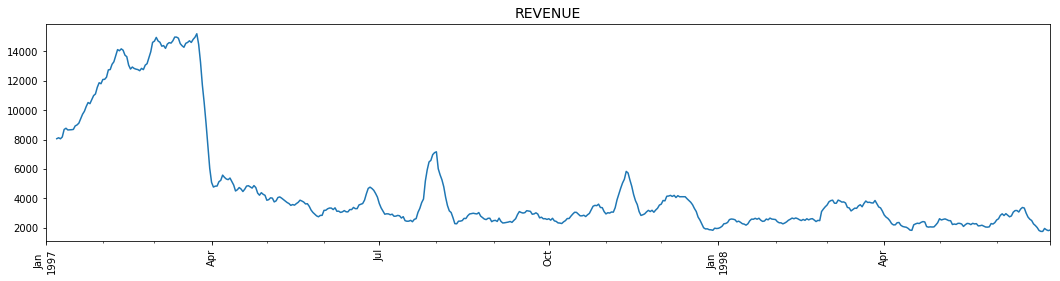

In [12]:
pycrm.plotting.plot_transaction_timeseries(df_cdnow_agg, rolling_window=7)

In [6]:
df_cdnow_agg

,revenue
order_date,
1997-12-31,2024161.26
1998-12-31,476154.37


In [17]:
lang = 'Python'
adj = 'Very Good'
width = "<20"
f'{lang:{width}}: {adj:{width}}'
# Out[582]: '              Python:            Very Good'

'Python              : Very Good           '

In [46]:
v = 251246134 

f_mlt = 1/1e6
f_fmt = f".0f"
f_pref = "R$ "
f_suff = "M"

In [47]:
f"{pref}{v:{fmt}}{suff}"

'R$ 251M'

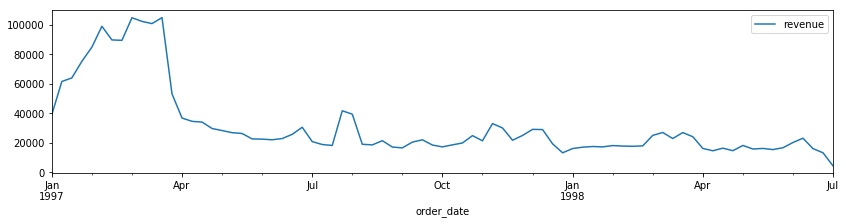

In [18]:
df_cdnow_agg.plot(kind="line", figsize=(14,3))

In [87]:
def plot_transaction_timeseries(transaction_series, reg=False, **kwargs):
       
    # input validation 
    if isinstance(transaction_series, pd.DataFrame):
        assert transaction_series.shape[1] == 1, "only single column pandas.DataFrame supported"
        transaction_series = transaction_series.copy()
    elif isinstance(transaction_series, pd.Series):
        transaction_series = transaction_series.copy().to_frame()
    else:
        raise TypeError(f"invalid transaction_series input: {type(transaction_series)} - pandas.Series or single column pandas.DataFrame supported only")
    assert isinstance(transaction_series.index, pd.DatetimeIndex), "index not of pandas.DatetimeIndex type"
    
    rolling_window = kwargs.get("rolling_window", 1)
    assert rolling_window > 0, "window must be positive"
    assert isinstance(rolling_window, int), "window must be an integer"  
    
    # creating figure    
    ax = kwargs.get("ax")
    if not ax:
        fig, ax = plt.subplots(figsize=kwargs.get("figsize", (18,4)))
        
    # plotting series
    (transaction_series.iloc[:, 0]).rolling(rolling_window).mean().plot(ax=ax, label=kwargs.get("label"))
    
    # perform (and plot) single linear regression on series
    # WARNING: simplistic treatment of timeseries data - should not be used in serious analysis
    if reg:
        f = np.poly1d(np.polyfit(range(transaction_series.shape[0]), (transaction_series.iloc[:, 0]).values, 1)) 
        transaction_series["fitted_line"] = f(np.arange(transaction_series.shape[0]))
        transaction_series["fitted_line"].plot(ax=ax, lw=2, ls='--', alpha=.5, label="Eq_normal: " + f"{f}".strip())
    
    # plot details shortcut
    if kwargs.get("legend", False):
        ax.legend()
    ax.set_title(kwargs.get("title", f"{transaction_series.columns[0].upper()}"), size=kwargs.get("title_size", 14))
    ax.set_xlabel(kwargs.get("xlabel", ""))
    ax.set_ylabel(kwargs.get("ylabel", ""))
    if "xlim" in kwargs:
        ax.set_xlim(kwargs.get("xlim"))
    if "ylim" in kwargs:
        ax.set_ylim(kwargs.get("ylim"))

    return ax
    

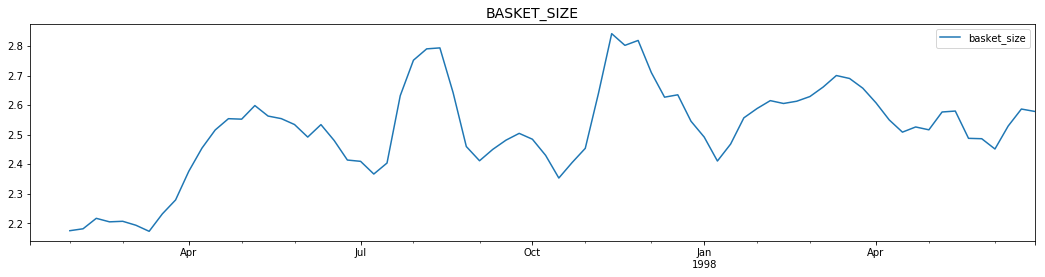

In [90]:
plot_transaction_timeseries(df_cdnow_agg, legend=True, rolling_window=4)

In [22]:
isinstance(df_cdnow_agg, pd.DataFrame)

True

In [30]:
isinstance(df_cdnow_agg["basket_size"].index, pd.DatetimeIndex)

True

In [32]:
df_cdnow_agg["basket_size"].to_frame()

,basket_size
order_date,
1997-01-12,2.182121
1997-01-19,2.113602
1997-01-26,2.190138
1997-02-02,2.213147
1997-02-09,2.208033
1997-02-16,2.255172
1997-02-23,2.142545
1997-03-02,2.220617
1997-03-09,2.154365


In [26]:
type(df_cdnow_agg.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
def plot_transactions_ts(transactional_df, frequency="M", aggregation="n_purchases", reg=False, black_friday_dates=None, plot_black_friday=False, plot_normal_only=False, **kwargs):
    """
    plota a evolucao das compras no tempo
    black_friday_dates:: list of datetime.date
    """

    if "black_friday" in transactional_df.columns:
        if frequency != 'Y':
            df = df.join(grouper["black_friday"].max())
            
    
    if plot_black_friday or plot_normal_only:
        assert "black_friday" in df.columns, "No Black Friday Information Available"
        
        # n_purchases on normal days
        df[f"{aggregation}_normal"] = df[aggregation]
        df.loc[df["black_friday"] == 1, f"{aggregation}_normal"] = np.nan
        df[f"{aggregation}_normal"] = df[f"{aggregation}_normal"].interpolate(method="linear")
        
        # por plotting reasons, considering "neighbor" rows as black_friday == 1
        try:
            bf_idx = [(i-1, i, i+1) for i in df.reset_index()[df.reset_index()["black_friday"] == 1].index]
            bf_idx = list(set(list(sum(bf_idx, ()))))
            df.iloc[bf_idx, (df.columns == "black_friday").argmax()] = 1
        except IndexError:
            pass
        
        # n_purchases on black friday days
        df[f"{aggregation}_bf"] = df[aggregation]
        df.loc[df["black_friday"] != 1, f"{aggregation}_bf"] = np.nan        
    
    # plot!
    ax = kwargs.get("ax")
    if not ax:
        fig, ax = plt.subplots(figsize=kwargs.get("figsize", (18,4)))

    if plot_black_friday:
        (df[f'{aggregation}_normal']).rolling(kwargs.get("rolling_window", 1)).mean().plot(ax=ax, label=kwargs.get("label_normal", "Normal"))
        (df[f'{aggregation}_bf']).rolling(kwargs.get("rolling_window", 1)).mean().plot(ax=ax, label=kwargs.get("label_bf", "Black Friday"))
        
        # simple linear regression - WARNING: simplistic treatment of timeseries data
        if reg:
            f = np.poly1d(np.polyfit(range(df.shape[0]), (df[f'{aggregation}_normal']).values, 1)) 
            df["fitted_line"] = f(np.arange(df.shape[0]))
            df["fitted_line"].plot(ax=ax, lw=2, ls='--', alpha=.5, label="Eq_normal: " + f"{f}".strip())
        
    elif plot_normal_only:
        (df[f'{aggregation}_normal']).rolling(kwargs.get("rolling_window", 1)).mean().plot(ax=ax, label=kwargs.get("label_normal", "Normal"))
        
        # simple linear regression - WARNING: simplistic treatment of timeseries data
        if reg:
            f = np.poly1d(np.polyfit(range(df.shape[0]), (df[f'{aggregation}_normal']).values, 1)) 
            df["fitted_line"] = f(np.arange(df.shape[0]))
            df["fitted_line"].plot(ax=ax, lw=2, ls='--', alpha=.5, label="Eq_normal: " + f"{f}".strip())
        
    else:
        (df[aggregation]).rolling(kwargs.get("rolling_window", 1)).mean().plot(ax=ax, label=kwargs.get("label"))
        
        # simple linear regression - WARNING: simplistic treatment of timeseries data
        if reg:
            f = np.poly1d(np.polyfit(range(df.shape[0]), (df[aggregation]).values, 1)) 
            df["fitted_line"] = f(np.arange(df.shape[0]))
            df["fitted_line"].plot(ax=ax, lw=2, ls='--', alpha=.5, label="Eq_normal: " + f"{f}".strip())

    if kwargs.get("legend", False):
        ax.legend()

    ax.set_title(kwargs.get("title", f"{aggregation.upper()} - {frequency}"), size=kwargs.get("title_size", 14))
    
    ax.set_xlabel(kwargs.get("xlabel",""))

    return ax
